# Problem Model

Let the rocket have the mass $m$, velocity $v$ and altitude $h$. It will be subject to the gravitational acceleration $g$ and aerodynamic drag $D$. The engine thrust $u \in [0,u_{max}]$ is the control input and it naturally consumes propellant causing the mass $m$ to decrease, at a rate proportional to $\gamma=1/(g_0I_{sp})$. 

$$
\begin{align}
\dot{h}&=v\\
\dot{v}&=(u-D)/m-g\\
\dot{m}&=-\gamma u
\end{align}
$$

The system is assumed to be fully observable, and the mass at start is $m_0$ and $m_1$ at $t_f$. Then,

$$
v(0) = v_0, \hspace{0.5cm} h(0) = h_0, \hspace{0.5cm} m(0) = m_0, \hspace{0.5cm} m(t_f) = m_1
$$

where $t_f$ is the final time. The optimization objective is,

$$
\max_{u(t)} h(t_f)
$$

subject to the aforementioned relations. 

# Solutions

It is, for some drag and gravitational models, possible to find an analytical solution the the problem. In particular, with no drag the optimal solution is simply to apply maximum possible thrust all the time until all fuel is spent. In general, a solution can be found with the help of Pontryagin's maximum principle. 

Assume that the aerodynamic drag depends on velocity and altitude, and that the gravity depends on altitude, $D=D(v,h)$, $g=g(h)$.

The Hamiltonian $H$ we seek to minimize is,

$$
H = \lambda_1 \left(\frac{u-D(v,h)}{m}-g(h)\right) + \lambda_2v - \lambda_3\gamma u
$$

with the Lagrange multiplier equations,

$$
\begin{align}
\dot{\lambda}_1&=\frac{D_v}{m}\lambda_1 - \lambda_2, &\lambda_1(t_f) &= 0\\
\dot{\lambda}_2&=\left(\frac{D_h}{m} + g_h\right)\lambda_1, &\lambda_2(t_f) &= -n_0+\lambda_1g_h\\
\dot{\lambda}_3&=\frac{u-D(v,h)}{m^2}\lambda_1, &\lambda_3(t_f) &= \mu_3
\end{align}
$$

The coefficient of the control input $u$ in the Hamiltonian is

$$
\sigma(t) = \frac{\lambda_1}{m}-\lambda_3\gamma
$$

Assume the form,

$$
\sigma(t) =
\begin{cases}
<0 & 0 \le t < t_1 \\ 
=0 & t_1 \le t < t_2 \\
>0 & t_2 \le t \le t_f
\end{cases}
$$

Minimization of $H$ implies that,

$$
u(t) = 
\begin{cases}
u_{max} & 0 \le t < t_1 \\ 
0 & t_2 \le t \le t_f
\end{cases}
$$

The singular interval $[t_1, t_2)$ is less straightforward. There $\sigma(t) \equiv 0$, meaning that also $\dot{\sigma}(t)=\ddot{\sigma}(t)=\dddot{\sigma}(t) \equiv 0$ etc.

$$
\dot{\sigma}(t)=\frac{1}{m^2} \left( (D_v+\gamma D)\lambda_1 - m\lambda_2\right) \equiv 0
$$

Substitute with $\lambda_1=\gamma m \lambda_3$,

$$
\gamma (D_v+\gamma D) \lambda_3 - \lambda_2 \equiv 0
$$

Now remember $\ddot{\sigma}(t) \equiv 0$,

$$
\dot{\lambda}_3 \tilde{D} + \lambda_3 \frac{d\tilde{D}}{dt} - \frac{1}{\gamma} \dot{\lambda}_2 \equiv 0
$$

where $\tilde{D} = D_v+\gamma D$. By further substitution and rearrangements an expression for $u$ in feedback form can be obtained,

$$
u(t) = D + mg + m\frac{D_h-g\gamma \tilde{D} - \tilde{D}_h v + m g_h}{\gamma \tilde{D} + \tilde{D}_v}
$$

The condition for the singular solution is,

$$
-D -mg + \tilde{D}v = 0
$$

For details see [1].

The solution will be of the form $u(t) = u_{max}$ until the condition above is fulfilled, then the singular trajectory shall be used until all the fuel is spent, then $u(t) = 0$. If the condition is never met, $u(t)$ then switches directly to $u(t) = 0$ when out of fuel. That happens e.g. when there is no drag. 

[1] T. Glad, L. Ljung, Control Theory - Multivariable and Nonlinear Methods, Taylor & Francis, 2000

An implementation of this controller is provided in <optimal.py>

Maximum altitude reached: 1.0122079818367078


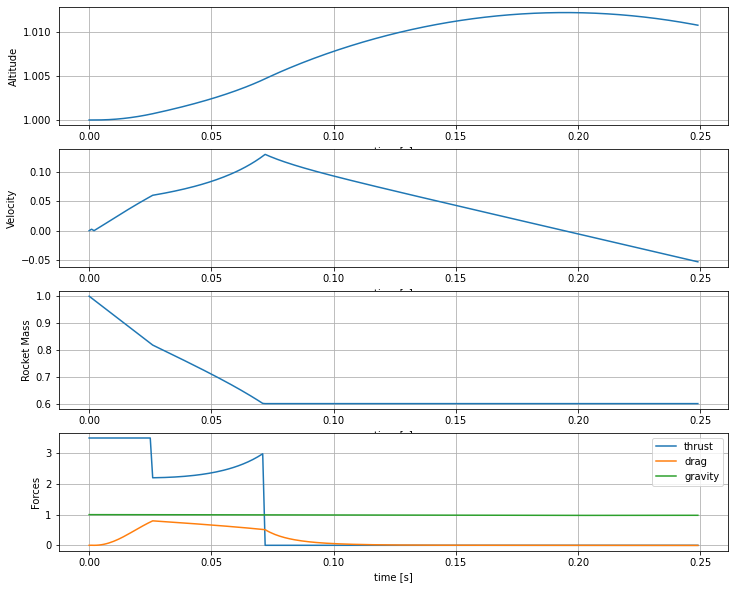

In [1]:
import numpy as np
from goddard_env import GoddardEnv
from optimal import DefaultControlled, OptimalController

rocket = DefaultControlled()
env = GoddardEnv(rocket)
oc = OptimalController(rocket)

state = env.reset()

state_log = [state]
extra_log = []

time = np.arange(0, 0.25, rocket.DT)

for _ in time:
    v, h, m = state
    (state, _, _, extra) = env.step(action=[oc.control(v, h, m)])
    state_log.append(state)
    extra_log.append(list(extra.values())[1:])

print("Maximum altitude reached: {}".format(env.maximum_altitude()))

import matplotlib.pyplot as plt

state_log = np.array(state_log)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 10))

ax1.plot(time, state_log[:-1,1])
ax1.grid(True)
ax1.set(xlabel='time [s]', ylabel='Altitude')

ax2.plot(time, state_log[:-1,0])
ax2.grid(True)
ax2.set(xlabel='time [s]', ylabel='Velocity')

ax3.plot(time, state_log[:-1,2])
ax3.grid(True)
ax3.set(xlabel='time [s]', ylabel='Rocket Mass')

ax4.plot(time, extra_log)
ax4.grid(True)
ax4.set(xlabel='time [s]', ylabel='Forces')
ax4.legend(env.extras_labels()[1:], loc='upper right')

plt.show()

env.close()